# **EXPERIMENT II**

In this experiment, we will apply these layers:

1. Dense with 1024 Fully Connected layers
2. Without Dropout layer
3. Batch Normalization

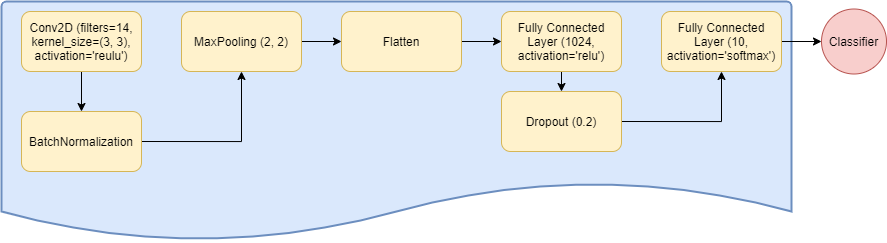

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

print(train_images.shape)
print(test_images.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [5]:
# Initialize the He initializer
initializer = tf.keras.initializers.HeNormal()

model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3) , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3687424   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history_data = model.fit(x=train_images, 
                         y=train_labels,
                         epochs=300)

Epoch 1/300
1563/1563 [==============================] - 36s 3ms/step - loss: 1.6901 - accuracy: 0.4519
Epoch 2/300
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9628 - accuracy: 0.6677
Epoch 3/300
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6875 - accuracy: 0.7626
Epoch 4/300
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4816 - accuracy: 0.8361
Epoch 5/300
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3278 - accuracy: 0.8895
Epoch 6/300
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2403 - accuracy: 0.9199
Epoch 7/300
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2099 - accuracy: 0.9324
Epoch 8/300
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1636 - accuracy: 0.9474
Epoch 9/300
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1459 - accuracy: 0.9535
Epoch 10/300
1563/1563 [==============================] - 4s 3ms/step - 

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def eval_model(model, test_images, test_labels):
  predictions = np.argmax(model.predict(test_images), axis=1)
  print(str(accuracy_score(y_pred=predictions, y_true=test_labels)))
  print(str(recall_score(y_pred=predictions, y_true=test_labels, average='micro')))

In [8]:
eval_model(model, test_images, test_labels)

0.6492
0.6492


In [9]:
model.save('/content/gdrive/MyDrive/Tradition_FE_Extraction vs CNN/Models/EXP2-Cifar-10_model_CNN_Approach_v1.h5')

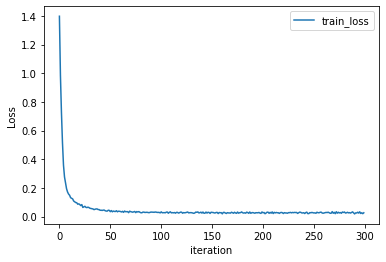

In [10]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

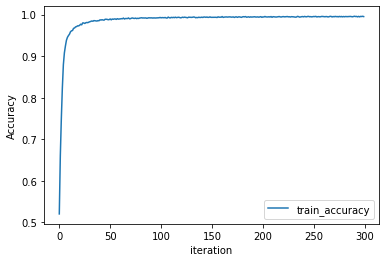

In [11]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()